### Explore Bike Share Data

Exploring Bike Share Data in New York, Chicago, and Washington D.C!

In [1]:
library("dplyr")
library("ggplot2")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Assessment

I'd like to start off this project by doing an assessment of each dataset. Checking brief summary statistics as well as seeing if there's any null values. Let's see what we're working with!

## New York

In [2]:
# Reading in the Chicago, Washington, and New York datasets.

ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
# Grabbing the top 5 rows of the new york dataset.

head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
# Checking data types.

str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


In [5]:
# Checking the summary statistics. Very similiar to pythons describe()

summary(ny)

       X                         Start.Time                   End.Time    
 Min.   :     47   2017-05-11 18:26:10:    3   2017-01-03 08:54:10:    2  
 1st Qu.:1712425   2017-01-04 13:58:24:    2   2017-01-04 17:21:55:    2  
 Median :3418634   2017-01-09 09:36:01:    2   2017-01-05 17:25:17:    2  
 Mean   :3415873   2017-01-21 15:36:56:    2   2017-01-12 08:34:01:    2  
 3rd Qu.:5123382   2017-01-21 17:49:59:    2   2017-01-12 09:41:54:    2  
 Max.   :6816152   2017-01-21 20:08:29:    2   2017-01-12 20:34:42:    2  
                   (Other)            :54757   (Other)            :54758  
 Trip.Duration                     Start.Station  
 Min.   :     61.0   Pershing Square North:  592  
 1st Qu.:    368.0   W 21 St & 6 Ave      :  385  
 Median :    610.0   Broadway & E 22 St   :  383  
 Mean   :    903.6   E 17 St & Broadway   :  380  
 3rd Qu.:   1051.0   West St & Chambers St:  364  
 Max.   :1088634.0   W 20 St & 11 Ave     :  329  
 NA's   :1           (Other)              :

In [6]:
# Finding the position of missing values by column.

sapply(ny, function(x) which(is.na(x)))
       

$X
integer(0)

$Start.Time
integer(0)

$End.Time
integer(0)

$Trip.Duration
[1] 54770

$Start.Station
integer(0)

$End.Station
integer(0)

$User.Type
integer(0)

$Gender
integer(0)

$Birth.Year
   [1]     9    11    20    24    33    37    39    53    61    66    79   108
  [13]   114   119   124   125   138   140   141   142   169   184   192   198
  [25]   204   208   211   217   225   226   227   234   237   239   243   245
  [37]   264   266   283   284   292   298   306   309   328   330   334   340
  [49]   360   365   367   370   371   406   409   422   436   455   463   473
  [61]   507   522   524   525   535   546   554   558   569   584   596   612
  [73]   614   620   636   655   675   677   686   698   711   719   735   739
  [85]   740   756   769   775   776   782   797   801   805   807   808   813
  [97]   831   833   843   875   882   883   889   890   897   923   924   925
 [109]   929   930   936   942   946   950   955   969   984  1000  1012  1013
 [121]  1018  1029  1090  1098  1126  1135  1138  1141  1142  1148  1156  1163
 [133]  1175  1187  1230  1231  1242  1245  1255  1270  1301  1303  1315  1323
 [145]  1340  1341  1350  1355  1372  1377  1387  1397  1401  1402  1410  1412
 [157]  1415  1420  1423  1429  1434  1437  1445  1448  1450  1469  1470  1488
 [169]  1495  1498  1519  1523  1530  1531  1544  1552  1567  1572  1573  1595
 [181]  1614  1624  1628  1652  1662  1667  1697  1700  1724  1732  1734  1740
 [193]  1743  1748  1770  1771  1775  1785  1789  1797  1817  1821  1832  1845
 [205]  1846  1850  1871  1874  1880  1885  1891  1898  1899  1906  1910  1922
 [217]  1930  1931  1936  1937  1950  1962  1964  1971  1979  2012  2013  2031
 [229]  2037  2048  2049  2051  2058  2082  2098  2102  2143  2154  2155  2190
 [241]  2194  2206  2224  2240  2246  2263  2276  2281  2291  2296  2300  2314
 [253]  2333  2345  2359  2360  2376  2380  2404  2413  2414  2415  2437  2441
 [265]  2477  2480  2488  2491  2496  2505  2514  2528  2538  2548  2558  2561
 [277]  2576  2579  2585  2591  2609  2610  2616  2630  2637  2692  2703  2704
 [289]  2715  2721  2724  2733  2744  2753  2757  2763  2773  2777  2778  2784
 [301]  2794  2795  2811  2813  2814  2817  2844  2869  2872  2905  2916  2924
 [313]  2926  2933  2934  2940  2961  2968  2980  2983  2985  3008  3015  3043
 [325]  3056  3057  3061  3091  3093  3109  3117  3120  3125  3132  3133  3135
 [337]  3137  3173  3196  3199  3207  3223  3225  3227  3240  3249  3267  3273
 [349]  3294  3312  3317  3327  3332  3345  3396  3418  3419  3421  3426  3429
 [361]  3437  3439  3454  3456  3457  3465  3485  3490  3502  3504  3508  3515
 [373]  3517  3519  3555  3569  3580  3582  3594  3604  3616  3618  3628  3634
 [385]  3640  3643  3644  3646  3647  3673  3684  3685  3687  3698  3701  3714
 [397]  3715  3720  3762  3763  3770  3774  3779  3781  3784  3790  3797  3868
 [409]  3883  3887  3889  3893  3901  3903  3920  3924  3945  3963  3990  4002
 [421]  4028  4060  4066  4069  4070  4094  4095  4107  4121  4148  4153  4157
 [433]  4169  4184  4210  4229  4236  4248  4254  4260  4281  4291  4310  4314
 [445]  4361  4362  4369  4376  4385  4401  4430  4435  4436  4447  4450  4451
 [457]  4453  4520  4542  4547  4578  4589  4602  4605  4615  4658  4668  4677
 [469]  4693  4728  4736  4740  4756  4764  4785  4786  4795  4798  4812  4820
 [481]  4831  4837  4876  4878  4889  4906  4917  4942  4958  5004  5009  5011
 [493]  5014  5016  5040  5041  5059  5064  5075  5088  5115  5116  5121  5139
 [505]  5140  5175  5180  5184  5186  5191  5201  5206  5218  5236  5242  5282
 [517]  5289  5302  5307  5313  5316  5317  5325  5337  5341  5354  5362  5364
 [529]  5388  5393  5400  5401  5403  5414  5416  5417  5431  5466  5495  5520
 [541]  5523  5542  5554  5560  5571  5576  5587  5602  5608  5610  5612  5639
 [553]  5645  5646  5655  5663  5672  5673  5682  5702  5719  5721  5741  5754
 [565]  5762  5781  5797  5799  5801  5803  5818  5846  5854  5869  5876  5877
 [577]  5886  

In [7]:
# Finding the count of missing values by column.

sapply(ny, function(x) sum(is.na(x)))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          5218

In [8]:
# Displaying the row with a null value in Trip.Duration.

ny[54770,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
54770,6078570,2017-06-18 16:20:21,201,NA,,,,,NA


In [9]:
# Displaying all rows where Birth.Year is NA. 

ny[is.na(ny$Birth.Year), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
9,2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,,NA
11,2287178,2017-04-02 14:37:20,2017-04-02 14:56:12,1131,Bank St & Washington St,Little West St & 1 Pl,Customer,,NA
20,5857,2017-01-01 13:32:39,2017-01-01 13:49:57,1038,W 22 St & 8 Ave,W 45 St & 6 Ave,Customer,,NA
24,2497952,2017-04-08 13:39:48,2017-04-08 14:04:24,1476,Dean St & Hoyt St,Plaza St West & Flatbush Ave,Customer,,NA
33,3676202,2017-05-02 21:43:28,2017-05-02 22:29:15,2746,Old Fulton St,Broadway & E 14 St,Customer,,NA
37,1975396,2017-03-22 08:56:43,2017-03-22 09:07:13,630,Broadway & W 29 St,E 17 St & Broadway,Customer,,NA
39,5630375,2017-06-10 14:03:43,2017-06-10 14:05:00,76,Bayard St & Baxter St,Bayard St & Baxter St,Customer,,NA
53,2897347,2017-04-16 15:23:43,2017-04-16 15:44:16,1233,Cleveland Pl & Spring St,S 5 Pl & S 4 St,Customer,,NA
61,3847598,2017-05-06 15:58:00,2017-05-06 16:31:17,1997,Front St & Maiden Ln,Old Fulton St,Customer,,NA
66,6018157,2017-06-17 08:06:57,2017-06-17 08:35:44,1727,Pier 40 - Hudson River Park,Pier 40 - Hudson River Park,Customer,,NA


In [10]:
# Displaying all rows where Gender is 'NA'. We know there are empty values that should be 'NA' but are not. 

ny[is.na(ny$Gender), ]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year


## Washington

In [11]:
# Grabbing 10 samples from the Washington dataset.

wash[sample(nrow(wash), 10), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
60546,592574,2017-03-26 10:54:00,2017-03-26 12:00:00,3953.331,Bethesda Ave & Arlington Rd,31st & Water St NW,Customer
42982,1390193,2017-06-03 09:54:59,2017-06-03 09:57:54,174.841,Wilson Blvd & N Uhle St,Lee Hwy & N Adams St,Subscriber
81424,1100243,2017-05-09 05:57:01,2017-05-09 06:12:28,927.069,8th & H St NW,22nd & I St NW / Foggy Bottom,Subscriber
13566,192357,2017-02-03 08:53:00,2017-02-03 09:06:00,797.961,39th & Calvert St NW / Stoddert,20th St & Florida Ave NW,Subscriber
17562,1510836,2017-06-12 11:42:40,2017-06-12 11:54:00,680.417,Connecticut Ave & R St NW,Kennedy Center,Subscriber
41642,278100,2017-02-15 17:23:00,2017-02-15 17:32:00,534.702,4th & E St SW,Columbus Circle / Union Station,Subscriber
71808,307487,2017-02-19 12:00:00,2017-02-19 12:31:00,1840.795,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,C & O Canal & Wisconsin Ave NW,Customer
12910,1667238,2017-06-25 02:03:07,2017-06-25 02:24:21,1273.306,34th & Water St NW,Henry Bacon Dr & Lincoln Memorial Circle NW,Customer
66818,1295288,2017-05-26 12:53:23,2017-05-26 01:36:30,2587.035,Smithsonian-National Mall / Jefferson Dr & 12th St SW,23rd & E St NW,Customer
47574,895503,2017-04-20 06:26:16,2017-04-20 06:33:48,451.553,15th & P St NW,18th St & Wyoming Ave NW,Subscriber


In [12]:
# Checking data types.

str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


In [13]:
# Getting summary statistics by column.

summary(wash)

       X                         Start.Time                   End.Time    
 Min.   :      7   2017-02-19 12:19:00:    6   2017-03-09 17:54:00:    7  
 1st Qu.: 434587   2017-02-20 11:35:00:    6   2017-03-28 18:11:00:    7  
 Median : 872858   2017-02-24 17:46:00:    6   2017-01-13 17:48:00:    6  
 Mean   : 873881   2017-03-01 08:20:00:    6   2017-01-31 08:49:00:    6  
 3rd Qu.:1313305   2017-03-02 08:39:00:    6   2017-02-13 18:09:00:    6  
 Max.   :1751392   2017-03-09 17:31:00:    6   2017-02-20 11:38:00:    6  
                   (Other)            :89015   (Other)            :89013  
 Trip.Duration                                   Start.Station  
 Min.   :    60.3   Columbus Circle / Union Station     : 1700  
 1st Qu.:   410.9   Lincoln Memorial                    : 1546  
 Median :   707.0   Jefferson Dr & 14th St SW           : 1488  
 Mean   :  1234.0   Massachusetts Ave & Dupont Circle NW: 1219  
 3rd Qu.:  1233.2   Jefferson Memorial                  : 1068  
 Max.   :9

In [14]:
# Finding the position of missing values by column.

sapply(wash, function(x) which(is.na(x)))

$X
integer(0)

$Start.Time
integer(0)

$End.Time
integer(0)

$Trip.Duration
[1] 89051

$Start.Station
integer(0)

$End.Station
integer(0)

$User.Type
integer(0)

In [15]:
# Finding the count of missing values by column.

sapply(wash, function(x) sum(is.na(x)))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type 
            0             0

In [16]:
# Displaying the one row that is NA. We can see that there is multiple empty values in multiple columns. 

wash[89051,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89051,132,,,NA,,,


## Chicago

In [17]:
# Grabbing the first 5 rows of the Chicago dataset.

head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [18]:
# Checking datatypes.

str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


In [19]:
# Checking summary statistics.

summary(chi)

       X                         Start.Time                  End.Time   
 Min.   :     36   2017-01-24 07:40:32:   2   2017-04-16 13:16:52:   2  
 1st Qu.: 386722   2017-04-22 13:16:25:   2   2017-04-26 16:29:26:   2  
 Median : 773554   2017-05-27 15:17:50:   2   2017-05-21 16:20:56:   2  
 Mean   : 776721   2017-06-10 13:29:41:   2   2017-05-27 09:58:21:   2  
 3rd Qu.:1171266   2017-06-20 17:05:11:   2   2017-06-25 14:51:35:   2  
 Max.   :1551248   2017-06-21 13:18:52:   2   2017-01-01 00:46:32:   1  
                   (Other)            :8618   (Other)            :8619  
 Trip.Duration                          Start.Station 
 Min.   :   60.0   Streeter Dr & Grand Ave     : 210  
 1st Qu.:  394.2   Lake Shore Dr & Monroe St   : 140  
 Median :  670.0   Clinton St & Washington Blvd: 120  
 Mean   :  937.2   Clinton St & Madison St     : 102  
 3rd Qu.: 1119.0   Canal St & Adams St         : 101  
 Max.   :85408.0   Michigan Ave & Oak St       :  98  
                   (Other)     

In [20]:
# Finding the location of missing values.

sapply(chi, function(x) which(is.na(x)))

$X
integer(0)

$Start.Time
integer(0)

$End.Time
integer(0)

$Trip.Duration
integer(0)

$Start.Station
integer(0)

$End.Station
integer(0)

$User.Type
integer(0)

$Gender
integer(0)

$Birth.Year
   [1]    8   20   32   36   39   41   45   53   57   62   69   77   80   86
  [15]   87   96   99  103  106  107  119  126  137  151  152  153  159  164
  [29]  170  177  179  184  190  193  194  201  204  221  224  230  231  241
  [43]  248  252  253  262  268  278  284  285  308  315  318  326  328  335
  [57]  345  350  356  358  366  368  375  381  383  389  402  421  427  428
  [71]  429  436  444  451  455  459  462  469  472  473  474  478  481  483
  [85]  493  499  500  504  507  509  513  515  517  519  525  531  537  541
  [99]  546  555  559  560  562  563  570  572  574  585  593  594  598  611
 [113]  619  620  634  644  645  647  650  656  659  666  669  678  685  687
 [127]  689  694  706  710  715  720  722  723  724  727  728  730  735  736
 [141]  739  741  751  756  757  763  773  774  777  780  782  788  791  794
 [155]  795  797  799  810  812  821  822  825  833  836  849  850  872  873
 [169]  875  880  888  889  897  901  902  906  909  915  920  926  928  933
 [183]  941  947  948  952  954  963  974  975  979  997 1001 1002 1012 1024
 [197] 1029 1047 1049 1051 1057 1064 1068 1071 1084 1098 1099 1100 1101 1103
 [211] 1119 1122 1124 1126 1135 1150 1166 1167 1170 1171 1181 1184 1198 1208
 [225] 1209 1213 1229 1231 1233 1237 1240 1243 1248 1252 1254 1258 1265 1267
 [239] 1268 1272 1276 1298 1300 1303 1309 1315 1317 1319 1320 1323 1325 1328
 [253] 1331 1339 1348 1349 1351 1357 1373 1375 1377 1378 1381 1384 1395 1396
 [267] 1399 1404 1416 1420 1428 1431 1435 1437 1438 1444 1451 1454 1456 1461
 [281] 1465 1467 1468 1478 1481 1486 1488 1496 1500 1501 1508 1510 1514 1518
 [295] 1534 1540 1553 1560 1564 1568 1580 1587 1591 1595 1603 1605 1609 1615
 [309] 1618 1622 1625 1634 1636 1637 1645 1646 1651 1652 1657 1661 1666 1671
 [323] 1674 1682 1685 1691 1693 1707 1713 1716 1725 1734 1736 1741 1744 1747
 [337] 1751 1755 1758 1759 1769 1770 1772 1773 1777 1784 1785 1786 1787 1788
 [351] 1790 1807 1813 1824 1825 1826 1828 1833 1834 1837 1846 1849 1855 1856
 [365] 1861 1872 1873 1882 1883 1884 1892 1900 1901 1903 1904 1908 1909 1910
 [379] 1911 1916 1917 1926 1929 1935 1950 1953 1955 1966 1968 1969 1971 1975
 [393] 1977 1982 2000 2004 2005 2007 2011 2013 2015 2018 2019 2023 2025 2026
 [407] 2030 2035 2050 2056 2059 2061 2064 2074 2079 2080 2084 2086 2096 2098
 [421] 2105 2108 2109 2113 2118 2123 2127 2131 2132 2137 2139 2143 2146 2154
 [435] 2161 2169 2170 2176 2182 2183 2187 2188 2189 2190 2194 2197 2200 2202
 [449] 2203 2204 2205 2211 2223 2224 2227 2231 2248 2259 2266 2272 2280 2281
 [463] 2288 2293 2294 2297 2299 2314 2318 2321 2325 2332 2354 2366 2375 2388
 [477] 2391 2393 2398 2403 2404 2405 2408 2413 2420 2422 2433 2434 2442 2449
 [491] 2451 2452 2456 2464 2474 2475 2478 2482 2483 2485 2486 2487 2492 2493
 [505] 2494 2495 2500 2511 2517 2519 2522 2523 2530 2536 2537 2550 2560 2561
 [519] 2562 2564 2570 2576 2585 2590 2591 2597 2602 2603 2608 2611 2613 2620
 [533] 2628 2631 2634 2639 2645 2651 2659 2661 2665 2670 2688 2689 2693 2695
 [547] 2702 2705 2719 2720 2724 2728 2735 2744 2749 2752 2756 2767 2776 2787
 [561] 2788 2792 2795 2796 2802 2804 2809 2811 2814 2815 2816 2818 2819 2820
 [575] 2822 2825 2829 2831 2838 2839 2840 2841 2842 2844 2850 2851 2854 2857
 [589] 2861 2863 2864 2872 2875 2892 2893 2909 2915 2916 2933 2936 2940 2949
 [603] 2957 2959 2964 2965 2966 2969 2976 2977 2978 2980 2983 2988 2992 3000
 [617] 3005 3007 3019 3021 3023 3026 3027 3038 3044 3050 3057 3059 3061 3066
 [631] 3067 3071 3076 3078 3079 3083 3086 3098 3106 3110 3111 3114 3115 3116
 [645] 3119 3122 3126 3133 3144 3147 3148 3153 3157 3162 3174 3188 3198 3201
 [659] 3206 3213 3216 3217 3220 3225 3242 3245 3251 3259 3260 3264 3270 3274
 [673] 3283 3293 3301 3303 3308 3310 3321 3328 3330 3331 3332 3337 3340 3352
 [687] 3357 3369 3375 3381 3388 

In [21]:
# Getting the count of missing values by column.

colSums(is.na(chi))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             0             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          1747

In [22]:
# Selecting all rows where Birth.Year is 'NA'. Again, just like the other datasets, there are multiple columns where 
# values are actually empty. This will be dealt with below in 'Cleaning'.

chi[is.na(chi$Birth.Year), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8,65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,,NA
20,475456,2017-04-08 11:37:55,2017-04-08 11:51:55,840,Adler Planetarium,Burnham Harbor,Customer,,NA
32,1539334,2017-06-30 10:56:50,2017-06-30 11:40:20,2610,McCormick Place,Adler Planetarium,Customer,,NA
36,243879,2017-02-22 15:33:56,2017-02-22 15:54:07,1211,Streeter Dr & Grand Ave,Theater on the Lake,Customer,,NA
39,720062,2017-05-03 16:27:08,2017-05-03 16:45:15,1087,Clark St & Elm St,Michigan Ave & Pearson St,Customer,,NA
41,1314009,2017-06-16 19:34:44,2017-06-16 20:16:23,2499,State St & Van Buren St,McClurg Ct & Erie St,Customer,,NA
45,1372709,2017-06-20 16:14:15,2017-06-20 16:42:26,1691,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,,NA
53,157790,2017-02-11 15:11:34,2017-02-11 16:30:04,4710,McCormick Place,Wabash Ave & Wacker Pl,Customer,,NA
57,1526760,2017-06-29 13:50:47,2017-06-29 14:10:04,1157,Lake Shore Dr & Belmont Ave,Lake Shore Dr & North Blvd,Customer,,NA
62,1539175,2017-06-30 10:44:24,2017-06-30 11:11:03,1599,Millennium Park,Streeter Dr & Grand Ave,Customer,,NA


# Cleaning

Fill all empty values in the table with 'NA'. Try the code to find location of 'NA' values in the table again. The original in the assesment was wrong.

## Cleaning New York

In [23]:
# Creating a new dataframe (ny_2), replacing all blanks AND spaces with 'NA'.

ny_2 <- ny
ny_2[ny_2 == "" | ny_2 == " "] <- NA
head(ny_2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [24]:
# Finding the actual count of 'NA' values in the ny_2 dataset.

colSums(is.na(ny_2))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             1 
  End.Station     User.Type        Gender    Birth.Year 
            1           119          5410          5218

## Cleaning Washington

In [79]:
# Creating a new dataframe (wash_2), replacing all blanks AND spaces with 'NA'.

wash_2 <- wash
wash_2[wash_2 == "" | wash_2 == " "] <- NA
head(wash_2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [26]:
# Finding the count of actual 'NA' values in wash_2 dataset.
 
colSums(is.na(wash_2))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             1             1             1             1 
  End.Station     User.Type 
            1             1

## Cleaning Chicago

In [80]:
# Creating a new dataframe (chi_2), replacing all blanks AND spaces with 'NA'.

chi_2 <- chi
chi_2[chi_2 == "" | chi_2 == " "] <- NA
head(chi_2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [28]:
# Finding the actual count of 'NA' in chi_2.

colSums(is.na(chi_2))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             0             0 
  End.Station     User.Type        Gender    Birth.Year 
            1             1          1748          1747

### Question 1


#### In New York and Chicago, what does trip duration time look like by gender?

In [29]:
# We need to combine the ny and chi dataframes into one dataframe.

ny_chi <- rbind(ny_2, chi_2)
ny_chi[sample(nrow(ny_chi), 10), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
58740,171766,2017-02-14 13:44:11,2017-02-14 13:48:30,259,Calumet Ave & 33rd St,State St & 33rd St,Subscriber,Female,1994
23501,4687277,2017-05-23 13:27:15,2017-05-23 14:34:23,4028,Grand Army Plaza & Central Park S,Central Park S & 6 Ave,Customer,NA,NA
9679,4876349,2017-05-27 14:19:39,2017-05-27 14:30:46,666,E 97 St & Madison Ave,Central Park West & W 102 St,Subscriber,Male,1983
3250,2178808,2017-03-29 15:43:39,2017-03-29 16:13:50,1811,Central Park West & W 102 St,W 63 St & Broadway,Subscriber,Male,1947
43556,4952174,2017-05-29 10:57:17,2017-05-29 11:11:40,862,3 Ave & E 62 St,Broadway & W 60 St,Subscriber,Male,1981
62768,1340930,2017-06-18 15:55:40,2017-06-18 16:14:19,1119,Shedd Aquarium,Dusable Harbor,Customer,NA,NA
6449,1749461,2017-03-08 17:42:03,2017-03-08 17:46:37,274,N 8 St & Driggs Ave,Grand St & Havemeyer St,Subscriber,Male,1977
16037,4553925,2017-05-20 13:18:45,2017-05-20 13:40:26,1300,Scholes St & Manhattan Ave,Suffolk St & Stanton St,Subscriber,Female,1986
51584,85541,2017-01-05 13:02:04,2017-01-05 13:30:05,1680,31 St & Thomson Ave,S 5 Pl & S 4 St,Subscriber,Female,1979
12395,4183873,2017-05-13 11:51:49,2017-05-13 11:55:21,211,Leonard St & Church St,Barclay St & Church St,Subscriber,Male,1974


In [30]:
# Checking to make our datasets were merged with the correct amount of rows.

nrow(ny_chi)

[1] 63400

In [31]:
# Dividing the Time.Duration column by 60 to get minutes instead of seconds.

ny_chi$Trip.Duration <- ny_chi$Trip.Duration/60
ny_chi[sample(nrow(ny_chi), 7), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
56971,791195,2017-05-11 17:53:58,2017-05-11 18:02:46,8.800000,Dayton St & North Ave,Damen Ave & Pierce Ave,Subscriber,Male,1990
42056,804740,2017-02-03 09:26:12,2017-02-03 09:40:28,14.266667,W 38 St & 8 Ave,Greenwich St & W Houston St,Subscriber,Male,1980
61877,841578,2017-05-15 15:57:59,2017-05-15 16:28:13,30.233333,Michigan Ave & Jackson Blvd,Lake Shore Dr & Monroe St,Customer,NA,NA
26740,4476614,2017-05-19 06:44:42,2017-05-19 07:10:55,26.216667,Central Park West & W 102 St,Grand Army Plaza & Central Park S,Subscriber,Male,1991
57080,868076,2017-05-17 08:40:45,2017-05-17 08:47:58,7.216667,Clark St & Congress Pkwy,Michigan Ave & Washington St,Subscriber,Male,1976
49195,3901565,2017-05-08 06:20:13,2017-05-08 06:33:50,13.616667,E 80 St & 2 Ave,W 52 St & 5 Ave,Subscriber,Male,1983
32965,1233967,2017-02-21 11:42:02,2017-02-21 11:57:12,15.166667,Broadway & E 22 St,Pike St & E Broadway,Subscriber,Male,1997


In [32]:
# Rounding the Trip.Duration column to a whole number. This will make it easier to plot.

ny_chi$Trip.Duration <- round(ny_chi$Trip.Duration)
ny_chi[sample(nrow(ny_chi), 7), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
9363,3925688,2017-05-08 15:21:38,2017-05-08 15:45:51,24,E 33 St & 5 Ave,Sullivan St & Washington Sq,Subscriber,Male,1990
17133,2977025,2017-04-18 07:46:59,2017-04-18 08:02:02,15,W 64 St & West End Ave,E 32 St & Park Ave,Subscriber,Male,1966
55068,351986,2017-03-17 06:18:10,2017-03-17 06:25:06,7,Clinton St & Madison St,State St & Van Buren St,Subscriber,Male,1960
2801,2435536,2017-04-06 10:00:02,2017-04-06 10:03:55,4,Liberty St & Broadway,Water - Whitehall Plaza,Subscriber,Male,1991
7550,4937647,2017-05-28 17:56:52,2017-05-28 18:01:45,5,W 67 St & Broadway,Broadway & W 60 St,Subscriber,Male,1980
32529,4285357,2017-05-16 07:43:41,2017-05-16 07:47:28,4,W 16 St & The High Line,9 Ave & W 22 St,Subscriber,Female,1991
45494,6188766,2017-06-20 19:04:57,2017-06-20 19:15:54,11,Barrow St & Hudson St,E 10 St & Avenue A,Subscriber,Male,1982


In [33]:
# Passing in ny_chi and ignore the NA values.

ny_chi <- na.omit(ny_chi)

Warning message:
“Removed 93 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 93 rows containing missing values (geom_point).”

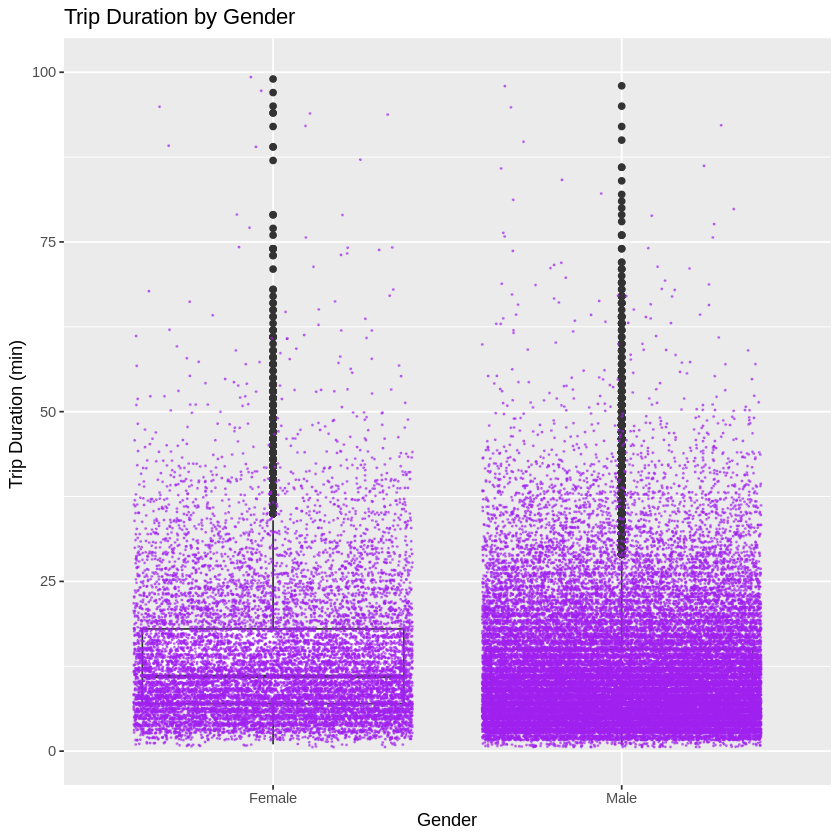

In [34]:
# Plotting the zoomed in version of a boxplot.

ggplot(ny_chi, aes(Gender, Trip.Duration)) +
            geom_boxplot() + 
            scale_y_continuous(limits= c(0,100)) +
            geom_jitter(color="purple", size=0.2, alpha=0.5) +
            ggtitle("Trip Duration by Gender") +
  xlab("Gender") + ylab("Trip Duration (min) ")

Note: The graph above is the zoomed in version of the plot below. The plot below is the original boxplot. Because the trip durations are congragated below 200 minutes, I wanted to show the zoomed in version as well.

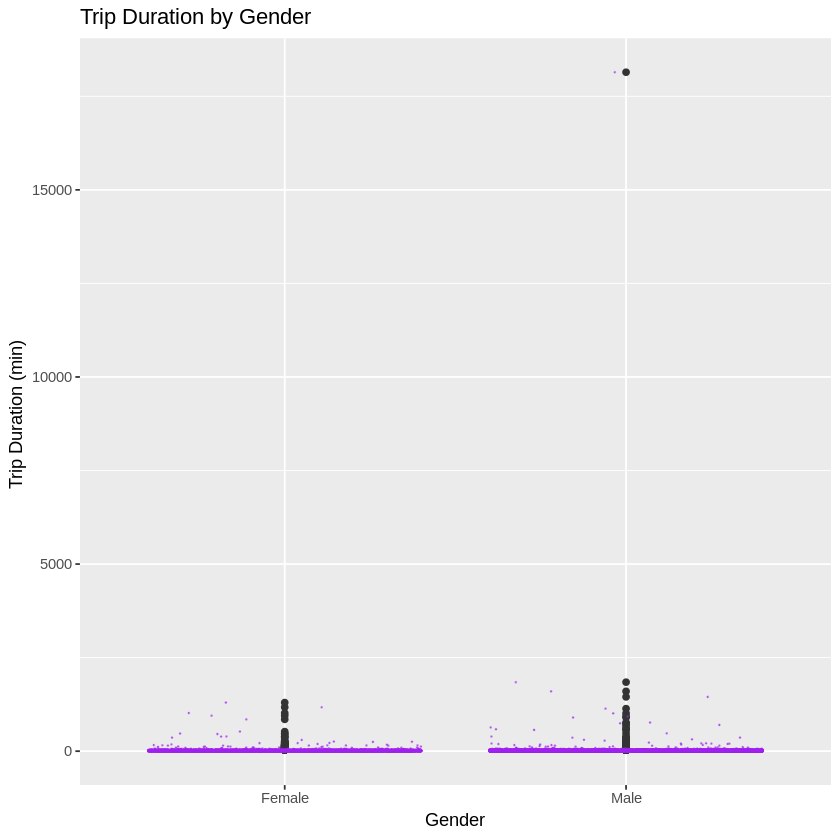

In [35]:
# Plotting the original 

ggplot(ny_chi, aes(Gender, Trip.Duration)) +
    geom_boxplot() +
    geom_jitter(color="purple", size=0.1, alpha=0.5) +
    ggtitle("Trip Duration by Gender") +
  xlab("Gender") + ylab("Trip Duration (min) ")

In [78]:
summary(allcity_data$Trip.Duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     6.00    11.00    17.64    19.00 18144.00 

**Summary of trip duration by Gender**

I chose to do two graphs for this question. Both of the above graphs represent that same data, however the first is zoomed in to where the most congregated trip durations times were. The second graph is the entire representation that shows us outliers of having took a trip of over 15000 minutes, this is probably due to someone not returning a bike over a few days and should not be considered in the average (this is represented by max in summary statistics). We can tell by looking at graph one that men took slightly more trips than women. We can also tell by the graphs that the average trip taken was seen around 10-15 minutes, with some extending to 25-50 minutes. This lines up with the median of the Trip.Duration column, which is 11.

### Question 2

#### In Washington D.C., what were the top ten most frequently visited start stations?

In [37]:
# Creating a new variable (start_station) that finds the frequency (count) of each value in Start.Station column.

start_station <- table(wash_2$Start.Station)
start_station


                                                                 
                                                               0 
                                                  10th & E St NW 
                                                             355 
                                           10th & Florida Ave NW 
                                                             254 
                                                  10th & G St NW 
                                                             291 
                                                  10th & K St NW 
                                                             434 
                                             10th & Monroe St NE 
                                                              80 
                                                  10th & U St NW 
                                                             460 
                                   10th St & Constitution Ave NW 
         

In [38]:
# Passing in start_station to find the top ten most frequented starting stations.

top_startstation <- head(sort(start_station, decreasing=TRUE),n=10)
top_startstation


                      Columbus Circle / Union Station 
                                                 1700 
                                     Lincoln Memorial 
                                                 1546 
                            Jefferson Dr & 14th St SW 
                                                 1488 
                 Massachusetts Ave & Dupont Circle NW 
                                                 1219 
                                   Jefferson Memorial 
                                                 1068 
                                       15th & P St NW 
                                                 1040 
Smithsonian-National Mall / Jefferson Dr & 12th St SW 
                                                 1010 
          Henry Bacon Dr & Lincoln Memorial Circle NW 
                                                  910 
                               4th St & Madison Dr NW 
                                                  894 
  Eastern

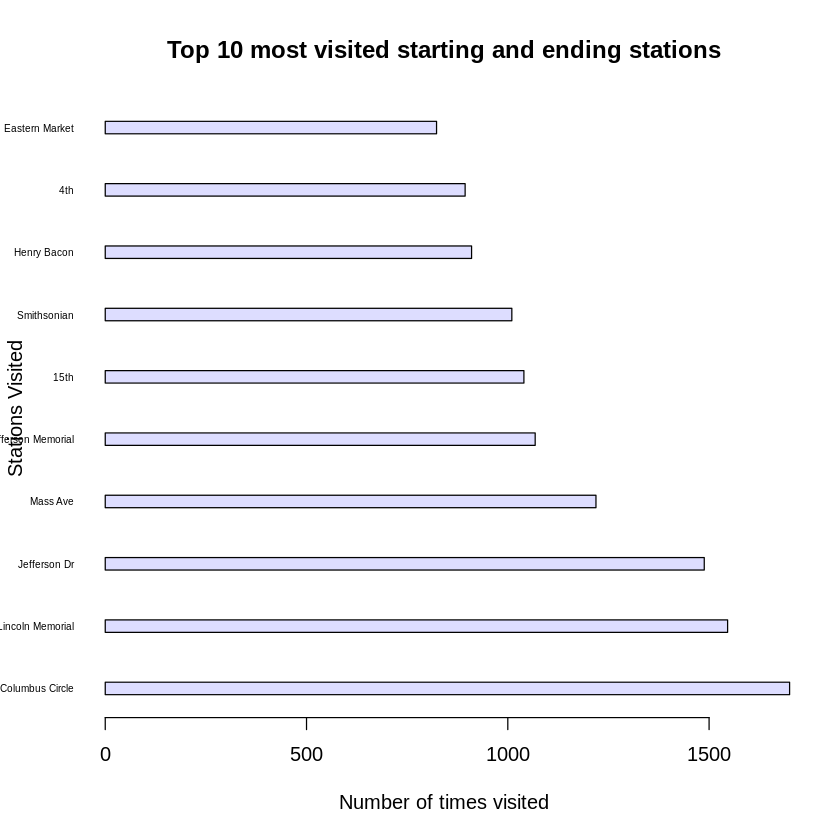

In [39]:
# Passing in the top_startstation variable and plotting the top ten most visited starting stations.

barplot(top_startstation,
        space=4,
        horiz=TRUE,
        col="#DDDDFF",
        border="#000000",
        main='Top 10 most visited starting and ending stations',
        xlab="Number of times visited",
        ylab="Stations Visited",
        names.arg=c("Columbus Circle", "Lincoln Memorial","Jefferson Dr", "Mass Ave", "Jefferson Memorial","15th","Smithsonian",
                       "Henry Bacon", "4th", "Eastern Market"),
        las=1,
        cex.names=0.5)

In [77]:
mean(top_startstation)

[1] 1169.8

In [41]:
median(top_startstation)

[1] 1054

**Summary of the top ten more frequented starting stations**

As we can see above in the bar plot, the top station to be visited was Columbus Circle. It was visited more than double the amount of times that the Eastern Market station was visited, even though it was still top ten! We can also see that from the top ten most visited stations, the average number of times that a station was visited was ~1170 times. The median is not far off, with 1054 being right in the middle.

Columbus Circle being visited the most would make sense, as it is right next to Union Station, which brings in people from nearby Virginia, Maryland, and the outskirts of Washington D.C. People are starting their day getting off at Union Station and grabbing a bike to go head to work and to visit the city when from out of town.

### Question 3

#### For all datasets, did people who were subscribed to the bike share program travel more than those who were not subscribed? 

Note: To answer this question I need to combine all datasets. However, in New York and Chicago, the 'Gender' and 'Birth.Year' columns are included, where as in Washington they are not. Since these columns are not relevant here, I will be dropping those columns first, and then combining with Washington.

In [42]:
# Making a copy of the ny_chi dataset as not to mess up the original dataframe I already created.

drop_nychi <- data.frame(ny_chi)
head(drop_nychi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,13,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,12,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,22,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,12,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,5,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,17,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [43]:
# Dropping 'Gender' and 'Birth.Year' columns.

drop_nychi <- subset(drop_nychi, select = -c(Gender, Birth.Year))
head(drop_nychi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,13,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,12,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,22,1 Pl & Clinton St,Henry St & Degraw St,Subscriber
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,12,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,5,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,17,State St & Smith St,Bond St & Fulton St,Subscriber


Note: I'm going to fix the 'Trip.Duration' column (Dividing by 60 and rounding to convert to minutes instead of seconds). I won't be using it but I want to keep all columns clean before merging.

In [44]:
# Converting the 'Trip.Duration' column to minutes by divding by 60.

wash_2$Trip.Duration <- wash_2$Trip.Duration/60
head(wash_2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,8.151100,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,6.709150,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,10.620850,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,30.455683,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,25.823783,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,6.633333,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [45]:
# Rounding the 'Trip.Duration' column.

wash_2$Trip.Duration <- round(wash_2$Trip.Duration)
head(wash_2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,8,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,7,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,11,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,30,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,26,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,7,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [46]:
# Merging all city tables.

allcity_data <- rbind(drop_nychi, wash_2)
allcity_data[sample(nrow(allcity_data), 7), ]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
59477,228302,2017-02-20 17:34:37,2017-02-20 17:43:17,9,Oak Park Ave & South Blvd,Oak Park Ave & Harrison St,Subscriber
74273,557821,2017-03-23 07:26:00,2017-03-23 07:30:00,4,1st & D St SE,M St & New Jersey Ave SE,Subscriber
27144,4956863,2017-05-29 14:19:00,2017-05-29 14:23:54,5,Lewis Ave & Kosciuszko St,Marcy Ave & Lafayette Ave,Subscriber
23580,6807573,2017-06-30 19:16:44,2017-06-30 19:23:08,6,Berkeley Pl & 7 Ave,10 St & 5 Ave,Subscriber
35009,6737026,2017-06-29 17:51:31,2017-06-29 18:07:29,16,Broadway & W 41 St,W 70 St & Amsterdam Ave,Subscriber
377341,1447281,2017-06-08 05:09:56,2017-06-08 05:24:33,15,14th & D St NW / Ronald Reagan Building,3rd St & Pennsylvania Ave SE,Subscriber
34186,1928164,2017-03-20 19:39:30,2017-03-20 19:44:27,5,Norfolk St & Broome St,Henry St & Grand St,Subscriber


In [47]:
# Double checking to make sure all rows that are merged are present.

nrow(allcity_data)

[1] 145176

In [51]:
# Omitting all 'NA' values.

allcity_data <- na.omit(allcity_data)

Warning message:
“Removed 843 rows containing non-finite values (stat_ydensity).”

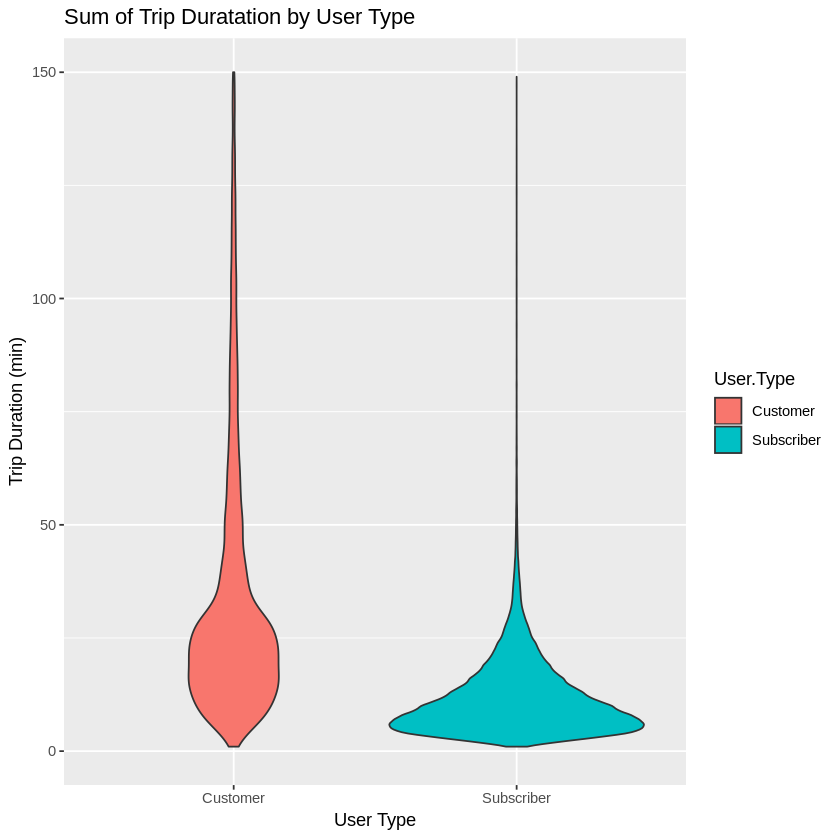

In [71]:
ggplot(allcity_data, aes(x=User.Type, y=Trip.Duration, fill=User.Type)) + 
  geom_violin() + 
  scale_y_continuous(limits= c(0,150)) +
  ggtitle("Sum of Trip Duratation by User Type") +
  xlab("User Type") + ylab("Trip Duration (min)")

Note: The graph above is the zoomed in version of the plot below. The plot below is the original violin chart. Because the trip durations are congragated below 200 minutes, I wanted to show the zoomed in version as well.

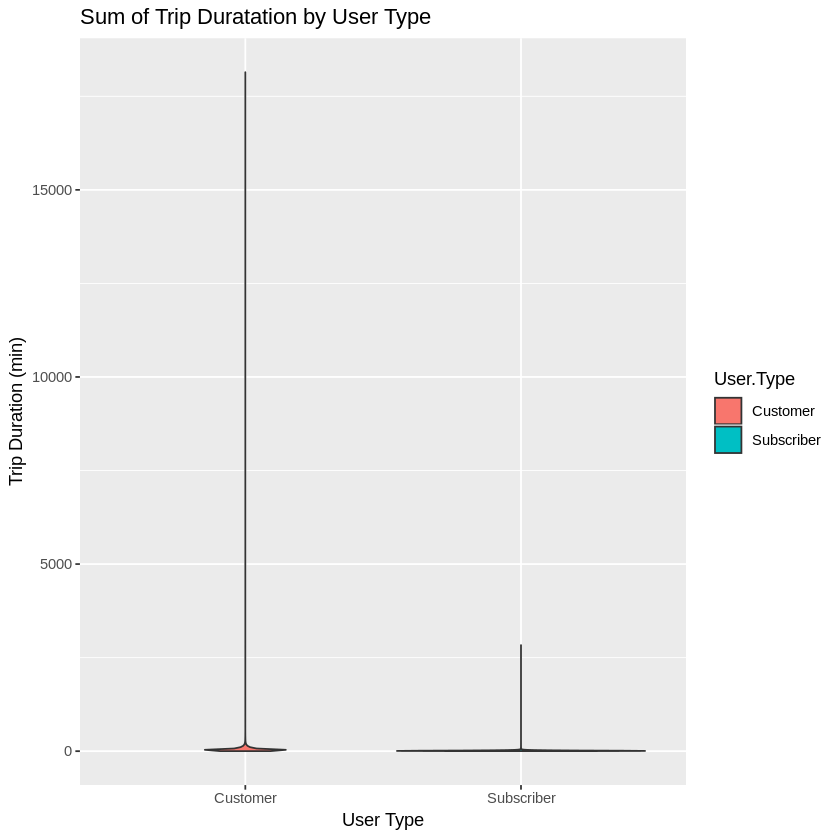

In [73]:
ggplot(allcity_data, aes(x=User.Type, y=Trip.Duration, fill=User.Type)) + 
  geom_violin() +
  ggtitle("Sum of Trip Duratation by User Type") +
  xlab("User Type") + ylab("Trip Duration (min)")

In [75]:
summary(allcity_data$Trip.Duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     6.00    11.00    17.64    19.00 18144.00 

**Summary of Trip Duration by Subscriber Type**

I chose to do two graphs to answer this question. Just like in my first questions, showing the data in it's original form was skewed because a few people didn't turn their bikes in for days on end, this is represented as 'max' in the summary statistics. The 'tail' of the violin was much larger than it should be because of this. I chose to zoom in on the main portion of users and trip duration, which is depecited in the first graph. 

Violin graphs are a combination of boxplot and kernerl density plot. The first graph shows us that subscribers were more likely to take more frequent but shorter trips where as regular customers (non-subscribers) took less frequent and longer trips. When we visually look at both violins we can see that the median would be around ~15, which would match up with the true median of 11 minutes per trip.

In [81]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')